# 第2章 データを可視化し分析を行う10本ノック

In [22]:
using CSV
using Dates
using DataFrames
using DataFramesMeta
using Gadfly
using Statistics

## 11

In [2]:
order_data_df = CSV.read("../data/2章/order_data.csv", DataFrame)

Row,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
,Int64,Int64,String15,Int64,Int64,String31,String31,Int64,Int64,Int64,String31,String3,String15,String15,String15,String15
1,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
2,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
3,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
4,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
5,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済
6,78384157,16,C91828823,88,38723994,2020-04-01 11:00:00,2020-04-01 11:19:00,1,2122,1,蒲田店,TK,東京,東京,お持ち帰り,お支払済
7,75031687,144,C58120290,63,82478302,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2308,2,流山店,CH,千葉,千葉,デリバリー,お渡し済
8,83880121,77,C08085038,0,63603896,2020-04-01 11:00:00,2020-04-01 11:25:00,0,2112,2,大塚店,TK,東京,東京,デリバリー,お渡し済
9,26741317,22,C24382968,72,44038720,2020-04-01 11:00:00,2020-04-01 11:15:00,1,3120,9,国立店,TK,東京,東京,お持ち帰り,キャンセル


In [3]:
analyze_data_df = @chain order_data_df begin
    @rsubset begin
        :status in [1, 2]
    end
    @select(:store_id, :customer_id, :coupon_cd, :order_accept_date, :delivered_date, :total_amount, :store_name, :wide_area, :narrow_area, :takeout_name, :status_name)
end

Row,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
,Int64,String15,Int64,String31,String31,Int64,String31,String15,String15,String15,String15
1,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
2,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
3,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
4,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
5,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済
6,16,C91828823,88,2020-04-01 11:00:00,2020-04-01 11:19:00,2122,蒲田店,東京,東京,お持ち帰り,お支払済
7,144,C58120290,63,2020-04-01 11:00:00,2020-04-01 11:22:00,2308,流山店,千葉,千葉,デリバリー,お渡し済
8,77,C08085038,0,2020-04-01 11:00:00,2020-04-01 11:25:00,2112,大塚店,東京,東京,デリバリー,お渡し済
9,63,C67537445,60,2020-04-01 11:00:00,2020-04-01 11:10:00,3050,西多摩店,東京,東京,デリバリー,お渡し済


## 12

In [4]:
describe(analyze_data_df, :all)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Union…,Union…,Union…,Any,Union…,Int64,Int64,Int64,Any,Any,DataType
1,store_id,99.1138,55.9136,1,51.0,99.0,147.0,196,,196,0,574436,49,39,Int64
2,customer_id,,,C00002805,,,,C99998223,41332,41332,0,574436,C26387220,C90614204,String15
3,coupon_cd,49.4788,28.889,0,24.0,49.0,75.0,99,,100,0,574436,50,5,Int64
4,order_accept_date,,,2020-04-01 11:00:00,,,,2020-06-30 21:58:58,59055,59055,0,574436,2020-04-01 11:00:00,2020-06-30 21:58:58,String31
5,delivered_date,,,2020-04-01 11:10:00,,,,2020-06-30 22:55:56,523527,523527,0,574436,2020-04-01 11:18:00,2020-06-30 22:38:58,String31
6,total_amount,2960.09,954.283,698,2308.0,2808.0,3617.0,5100,,61,0,574436,4144,2064,Int64
7,store_name,,,あきる野店,,,,麻生店,195,195,0,574436,浅草店,杉並店,String31
8,wide_area,,,北関東,,,,神奈川,5,5,0,574436,東京,東京,String15
9,narrow_area,,,千葉,,,,茨城,7,7,0,574436,東京,東京,String15


In [5]:
describe(analyze_data_df, :eltype)

Row,variable,eltype
,Symbol,DataType
1,store_id,Int64
2,customer_id,String15
3,coupon_cd,Int64
4,order_accept_date,String31
5,delivered_date,String31
6,total_amount,Int64
7,store_name,String31
8,wide_area,String15
9,narrow_area,String15


In [6]:
analyze_data_df = @chain analyze_data_df begin
    @rtransform begin
        :store_id = string(:store_id)
        :coupon_cd = string(:coupon_cd)
    end
end

Row,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
,String,String15,String,String31,String31,Int64,String31,String15,String15,String15,String15
1,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
2,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
3,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
4,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
5,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済
6,16,C91828823,88,2020-04-01 11:00:00,2020-04-01 11:19:00,2122,蒲田店,東京,東京,お持ち帰り,お支払済
7,144,C58120290,63,2020-04-01 11:00:00,2020-04-01 11:22:00,2308,流山店,千葉,千葉,デリバリー,お渡し済
8,77,C08085038,0,2020-04-01 11:00:00,2020-04-01 11:25:00,2112,大塚店,東京,東京,デリバリー,お渡し済
9,63,C67537445,60,2020-04-01 11:00:00,2020-04-01 11:10:00,3050,西多摩店,東京,東京,デリバリー,お渡し済


In [7]:
describe(analyze_data_df, :all)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Union…,Union…,Union…,Any,Union…,Int64,Int64,Int64,Any,Any,DataType
1,store_id,,,1,,,,99,196,196,0,574436,49,39,String
2,customer_id,,,C00002805,,,,C99998223,41332,41332,0,574436,C26387220,C90614204,String15
3,coupon_cd,,,0,,,,99,100,100,0,574436,50,5,String
4,order_accept_date,,,2020-04-01 11:00:00,,,,2020-06-30 21:58:58,59055,59055,0,574436,2020-04-01 11:00:00,2020-06-30 21:58:58,String31
5,delivered_date,,,2020-04-01 11:10:00,,,,2020-06-30 22:55:56,523527,523527,0,574436,2020-04-01 11:18:00,2020-06-30 22:38:58,String31
6,total_amount,2960.09,954.283,698,2308.0,2808.0,3617.0,5100,,61,0,574436,4144,2064,Int64
7,store_name,,,あきる野店,,,,麻生店,195,195,0,574436,浅草店,杉並店,String31
8,wide_area,,,北関東,,,,神奈川,5,5,0,574436,東京,東京,String15
9,narrow_area,,,千葉,,,,茨城,7,7,0,574436,東京,東京,String15


## 13

In [8]:
tmp_df = @chain analyze_data_df begin
    @rtransform begin
        @astable begin
            :order_accept_date = Date(:order_accept_date, dateformat"y-m-d H:M:S")
            :year = Dates.year(:order_accept_date)
            :month = Dates.month(:order_accept_date)
            :year_month = :year * 100 + :month
        end
    end
    @select(:year_month, :total_amount)
    # groupby([:year, :month])
    # @combine(describe(:total_amount))
    # describe
    # by([:year, :month], describe)
end

Row,year_month,total_amount
,Int64,Int64
1,202004,4144
2,202004,2877
3,202004,2603
4,202004,2732
5,202004,2987
6,202004,2122
7,202004,2308
8,202004,2112
9,202004,3050


In [9]:
tmp_result_df = combine(groupby(tmp_df, :year_month), x -> describe(x, :all))
subset(tmp_result_df, :variable => x -> x .== :total_amount)

Row,year_month,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Nothing,Int64,Int64,Int64,Int64,Int64,DataType
1,202004,total_amount,2959.44,954.271,698,2308.0,2808.0,3586.0,5100,,61,0,189414,4144,1900,Int64
2,202005,total_amount,2960.33,954.823,698,2308.0,2808.0,3586.0,5100,,61,0,195684,2328,3901,Int64
3,202006,total_amount,2960.49,953.74,698,2308.0,2808.0,3617.0,5100,,61,0,189338,2732,2064,Int64


## 14

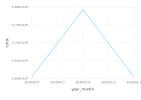

In [20]:
@chain tmp_df begin
    groupby(:year_month)
    @combine(:total = sum(:total_amount))
    plot(x = :year_month, y = :total, Geom.line)
end

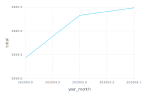

In [23]:
@chain tmp_df begin
    groupby(:year_month)
    @combine(:total = mean(:total_amount))
    plot(x = :year_month, y = :total, Geom.line)
end

## 15